In [68]:
import cosima_cookbook as cc
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cmocean as cm
from scipy.optimize import curve_fit
from xhistogram.xarray import histogram

from dask.distributed import Client

%matplotlib inline

In [69]:
client = Client(n_workers=8)
display(client)

<Client: 'tcp://127.0.0.1:38155' processes=8 threads=8, memory=128.85 GB>

In [70]:
### Generate new session

db = '/scratch/e14/mp2135/access-om2/archive/databases/1deg_jra55_ryf_experiments_abrupt_spinup500.db'
session = cc.database.create_session(db)

In [71]:
cc.querying.get_experiments(session)

experiment  ncfiles
0                          1deg_jra55_ryf_cont   150429
1                                    output111     2096
2                                    output112     2096
3                                    output113     2096
4                                    output114     2096
5                                    output115     2096
6                                    output116     2096
7                                    output117     2096
8                                    output118     2096
9                                    output119     2096
10          1deg_jra55_ryf_rcp45cool_spinup500    42426
11          1deg_jra55_ryf_rcp45warm_spinup500    47726
12          1deg_jra55_ryf_rcp45cool_spinup400    21206
13          1deg_jra55_ryf_rcp45warm_spinup400    21206
14       1deg_jra55_ryf_rcp45cool_x2_spinup500    42426
15       1deg_jra55_ryf_rcp45warm_x2_spinup500    42426
16       1deg_jra55_ryf_rcp45warm_x1_spinup500    42426
17       1deg_jra55_ryf_rcp45cool_x1_spinup500    42426
18    1deg_jra55_ryf_warm_0sat_8dwlw_spinup500    21206
19  1deg_jra55_ryf_warm_1.5sat_0dwlw_spinup500    21206
20                   1deg_jra55_ryf_RCPwarm_x1     9534
21                   1deg_jra55_ryf_RCPwarm_x2     9534
22             1deg_jra55_ryf_RCPwarm_humid_x1    21206
23             1deg_jra55_ryf_RCPwarm_humid_x2    21206

In [72]:
# Air-sea flux diagnostics

evap_heat = 'evap_heat' # < 0 cools ocean
sens_heat = 'sens_heat' # < 0 cools ocean
lw_heat = 'lw_heat' # < 0 cools ocean
swflx = 'swflx' # > 0 heats ocean

In [73]:
# I have to do this loop because the years 2455 onwards are stored as different experiments in this session, annoyingly... To be fixed. All it takes it reindexing the session.

yr_beg = '2401-01-01'
expt = '1deg_jra55_ryf_cont'

var = evap_heat
frequency = '1 monthly'
evap_cont = xr.concat([cc.querying.getvar(expt, var, session, start_time = yr_beg, frequency = frequency),
                       cc.querying.getvar('output111', var, session, frequency = frequency),
                       cc.querying.getvar('output112', var, session, frequency = frequency),
                       cc.querying.getvar('output113', var, session, frequency = frequency),
                       cc.querying.getvar('output114', var, session, frequency = frequency),
                       cc.querying.getvar('output115', var, session, frequency = frequency),
                       cc.querying.getvar('output116', var, session, frequency = frequency),
                       cc.querying.getvar('output117', var, session, frequency = frequency),
                       cc.querying.getvar('output118', var, session, frequency = frequency),
                       cc.querying.getvar('output119', var, session, frequency = frequency)], dim = 'time')

var = sens_heat
session = session
frequency = '1 monthly'
sens_cont = xr.concat([cc.querying.getvar(expt, var, session, start_time = yr_beg, frequency = frequency),
                       cc.querying.getvar('output111', var, session, frequency = frequency),
                       cc.querying.getvar('output112', var, session, frequency = frequency),
                       cc.querying.getvar('output113', var, session, frequency = frequency),
                       cc.querying.getvar('output114', var, session, frequency = frequency),
                       cc.querying.getvar('output115', var, session, frequency = frequency),
                       cc.querying.getvar('output116', var, session, frequency = frequency),
                       cc.querying.getvar('output117', var, session, frequency = frequency),
                       cc.querying.getvar('output118', var, session, frequency = frequency),
                       cc.querying.getvar('output119', var, session, frequency = frequency)], dim = 'time')

var = lw_heat
frequency = '1 monthly'
lw_cont = xr.concat([cc.querying.getvar(expt, var, session, start_time = yr_beg, frequency = frequency),
                       cc.querying.getvar('output111', var, session, frequency = frequency),
                       cc.querying.getvar('output112', var, session, frequency = frequency),
                       cc.querying.getvar('output113', var, session, frequency = frequency),
                       cc.querying.getvar('output114', var, session, frequency = frequency),
                       cc.querying.getvar('output115', var, session, frequency = frequency),
                       cc.querying.getvar('output116', var, session, frequency = frequency),
                       cc.querying.getvar('output117', var, session, frequency = frequency),
                       cc.querying.getvar('output118', var, session, frequency = frequency),
                       cc.querying.getvar('output119', var, session, frequency = frequency)], dim = 'time')

var = swflx
session = session
frequency = '1 monthly'
sw_cont = xr.concat([cc.querying.getvar(expt, var, session, start_time = yr_beg, frequency = frequency),
                       cc.querying.getvar('output111', var, session, frequency = frequency),
                       cc.querying.getvar('output112', var, session, frequency = frequency),
                       cc.querying.getvar('output113', var, session, frequency = frequency),
                       cc.querying.getvar('output114', var, session, frequency = frequency),
                       cc.querying.getvar('output115', var, session, frequency = frequency),
                       cc.querying.getvar('output116', var, session, frequency = frequency),
                       cc.querying.getvar('output117', var, session, frequency = frequency),
                       cc.querying.getvar('output118', var, session, frequency = frequency),
                       cc.querying.getvar('output119', var, session, frequency = frequency)], dim = 'time')

In [74]:
expt = '1deg_jra55_ryf_rcp45cool_x1_spinup500'

var = evap_heat
frequency = '1 monthly'
evap_coolx1 = cc.querying.getvar(expt, var, session, frequency = frequency)

var = sens_heat
frequency = '1 monthly'
sens_coolx1 = cc.querying.getvar(expt, var, session, frequency = frequency)

var = lw_heat
frequency = '1 monthly'
lw_coolx1 = cc.querying.getvar(expt, var, session, frequency = frequency)

var = swflx
frequency = '1 monthly'
sw_coolx1 = cc.querying.getvar(expt, var, session, frequency = frequency)

In [75]:
expt = '1deg_jra55_ryf_rcp45warm_x1_spinup500'

var = evap_heat
frequency = '1 monthly'
evap_warmx1 = cc.querying.getvar(expt, var, session, frequency = frequency)

var = sens_heat
frequency = '1 monthly'
sens_warmx1 = cc.querying.getvar(expt, var, session, frequency = frequency)

var = lw_heat
frequency = '1 monthly'
lw_warmx1 = cc.querying.getvar(expt, var, session, frequency = frequency)

var = swflx
frequency = '1 monthly'
sw_warmx1 = cc.querying.getvar(expt, var, session, frequency = frequency)

In [76]:
expt = '1deg_jra55_ryf_rcp45cool_x2_spinup500'

var = evap_heat
frequency = '1 monthly'
evap_coolx2 = cc.querying.getvar(expt, var, session, frequency = frequency)

var = sens_heat
frequency = '1 monthly'
sens_coolx2 = cc.querying.getvar(expt, var, session, frequency = frequency)

var = lw_heat
frequency = '1 monthly'
lw_coolx2 = cc.querying.getvar(expt, var, session, frequency = frequency)

var = swflx
frequency = '1 monthly'
sw_coolx2 = cc.querying.getvar(expt, var, session, frequency = frequency)

In [77]:
expt = '1deg_jra55_ryf_rcp45warm_x2_spinup500'

var = evap_heat
frequency = '1 monthly'
evap_warmx2 = cc.querying.getvar(expt, var, session, frequency = frequency)

var = sens_heat
frequency = '1 monthly'
sens_warmx2 = cc.querying.getvar(expt, var, session, frequency = frequency)

var = lw_heat
frequency = '1 monthly'
lw_warmx2 = cc.querying.getvar(expt, var, session, frequency = frequency)

var = swflx
frequency = '1 monthly'
sw_warmx2 = cc.querying.getvar(expt, var, session, frequency = frequency)

In [82]:
expt = '1deg_jra55_ryf_RCPwarm_humid_x1'

var = evap_heat
frequency = '1 monthly'
evap_warmx1_humid = cc.querying.getvar(expt, var, session, frequency = frequency)

var = sens_heat
frequency = '1 monthly'
sens_warmx1_humid = cc.querying.getvar(expt, var, session, frequency = frequency)

var = lw_heat
frequency = '1 monthly'
lw_warmx1_humid = cc.querying.getvar(expt, var, session, frequency = frequency)

var = swflx
frequency = '1 monthly'
sw_warmx1_humid = cc.querying.getvar(expt, var, session, frequency = frequency)

In [84]:
expt = '1deg_jra55_ryf_RCPwarm_humid_x2'

var = evap_heat
frequency = '1 monthly'
evap_warmx2_humid = cc.querying.getvar(expt, var, session, frequency = frequency)

var = sens_heat
frequency = '1 monthly'
sens_warmx2_humid = cc.querying.getvar(expt, var, session, frequency = frequency)

var = lw_heat
frequency = '1 monthly'
lw_warmx2_humid = cc.querying.getvar(expt, var, session, frequency = frequency)

var = swflx
frequency = '1 monthly'
sw_warmx2_humid = cc.querying.getvar(expt, var, session, frequency = frequency)

In [21]:
# Time integrate

month_length = evap_cont.time.dt.days_in_month

def time_integrate(array, start, end):
    # Array must be monthly averages for this to make sense
    
    return (array * month_length * 24 * 3600).sel(time = slice(start, end)).sum('time')

In [23]:
# Get land mask

temp_cont = cc.querying.getvar(expt, 'temp', session, frequency = '1 monthly')
dset = xr.merge([temp_cont.groupby('time.year').mean(dim='time').isel(year = 0, st_ocean = 0)])
ds = dset
mask_ocean = 2 * np.ones((ds.dims['yt_ocean'], ds.dims['xt_ocean'])) * np.isfinite(ds.temp)  
mask_land = 1 * np.ones((ds.dims['yt_ocean'], ds.dims['xt_ocean'])) * np.isnan(ds.temp)  
mask_array = mask_ocean + mask_land
#mask_array.plot.contour(colors = 'k', levels = [2])

#### Latent heat flux

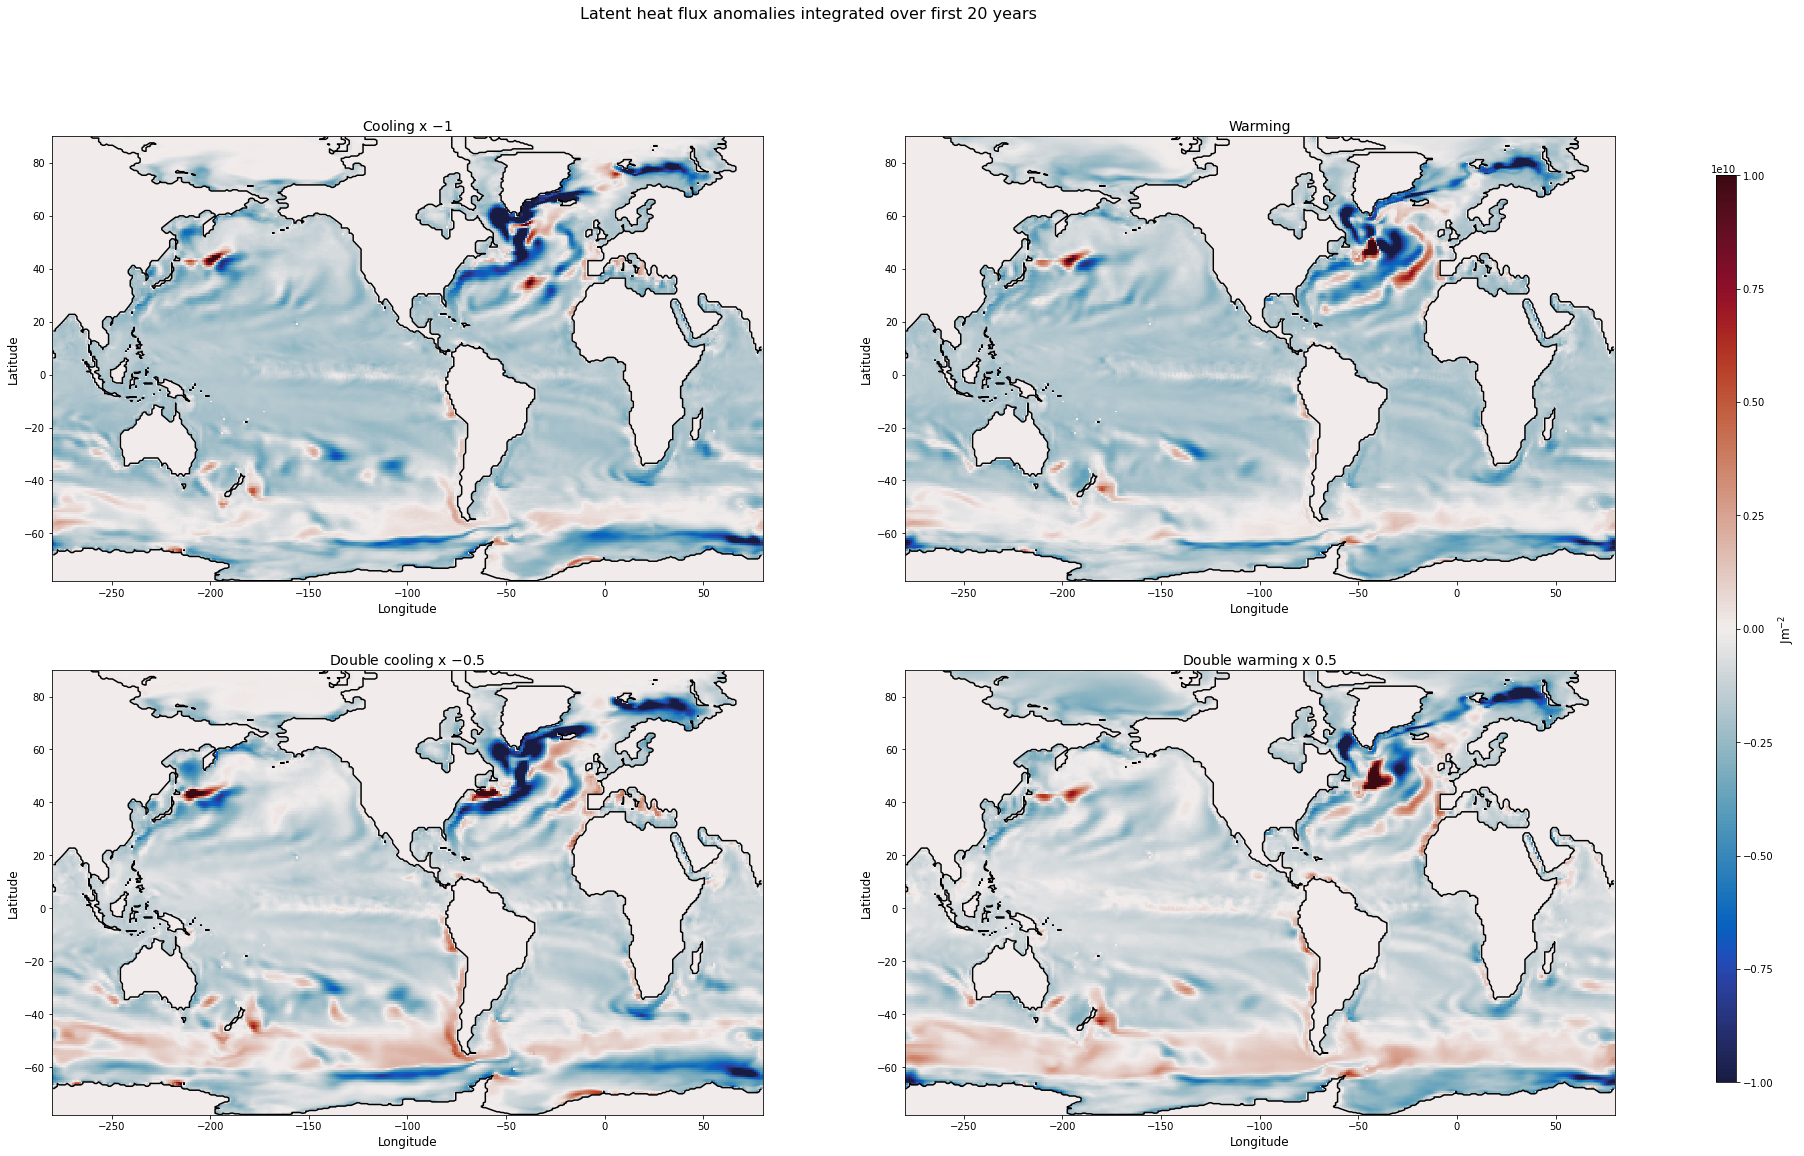

In [78]:
# Plot evap_heat (latent heat flux)

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(28, 18))
plt.suptitle('Latent heat flux anomalies integrated over first 20 years', fontsize=16)

yr_beg = '2400-01-01'
yr_end = '2419-12-31'

anom = evap_coolx1 - evap_cont
p1 = (- 1 * time_integrate(anom, yr_beg, yr_end)).plot(ax = axs[0, 0], cmap = cm.cm.balance, vmin = -1e10, vmax = 1e10, add_colorbar = False)
mask_array.plot.contour(colors = 'k', levels = [2], ax = axs[0, 0])
axs[0, 0].set_title('Cooling x $-1$', fontsize=14)
axs[0, 0].set_ylabel('Latitude', fontsize=12)
axs[0, 0].set_xlabel('Longitude', fontsize=12)

anom = evap_warmx1 - evap_cont
p2 = time_integrate(anom, yr_beg, yr_end).plot(ax = axs[0, 1], cmap = cm.cm.balance, vmin = -1e10, vmax = 1e10, add_colorbar = False)
mask_array.plot.contour(colors = 'k', levels = [2], ax = axs[0, 1])
axs[0, 1].set_title('Warming', fontsize=14)
axs[0, 1].set_ylabel('Latitude', fontsize=12)
axs[0, 1].set_xlabel('Longitude', fontsize=12)

anom = evap_coolx2 - evap_cont
p1 = (- 0.5 * time_integrate(anom, yr_beg, yr_end)).plot(ax = axs[1, 0], cmap = cm.cm.balance, vmin = -1e10, vmax = 1e10, add_colorbar = False)
mask_array.plot.contour(colors = 'k', levels = [2], ax = axs[1, 0])
axs[1, 0].set_title('Double cooling x $-0.5$', fontsize=14)
axs[1, 0].set_ylabel('Latitude', fontsize=12)
axs[1, 0].set_xlabel('Longitude', fontsize=12)

anom = evap_warmx2 - evap_cont
p2 = (0.5 * time_integrate(anom, yr_beg, yr_end)).plot(ax = axs[1, 1], cmap = cm.cm.balance, vmin = -1e10, vmax = 1e10, add_colorbar = False)
mask_array.plot.contour(colors = 'k', levels = [2], ax = axs[1, 1])
axs[1, 1].set_title('Double warming x $0.5$', fontsize=14)
axs[1, 1].set_ylabel('Latitude', fontsize=12)
axs[1, 1].set_xlabel('Longitude', fontsize=12)

cb_ax = fig.add_axes([0.95, 0.15, 0.01, 0.7])
cbar = fig.colorbar(p2, cax = cb_ax)
cbar.ax.set_ylabel('Jm$^{-2}$', fontsize = 12)
#plt.savefig('double_single_bad_pert_lh.jpg')

#### Sensible heat flux

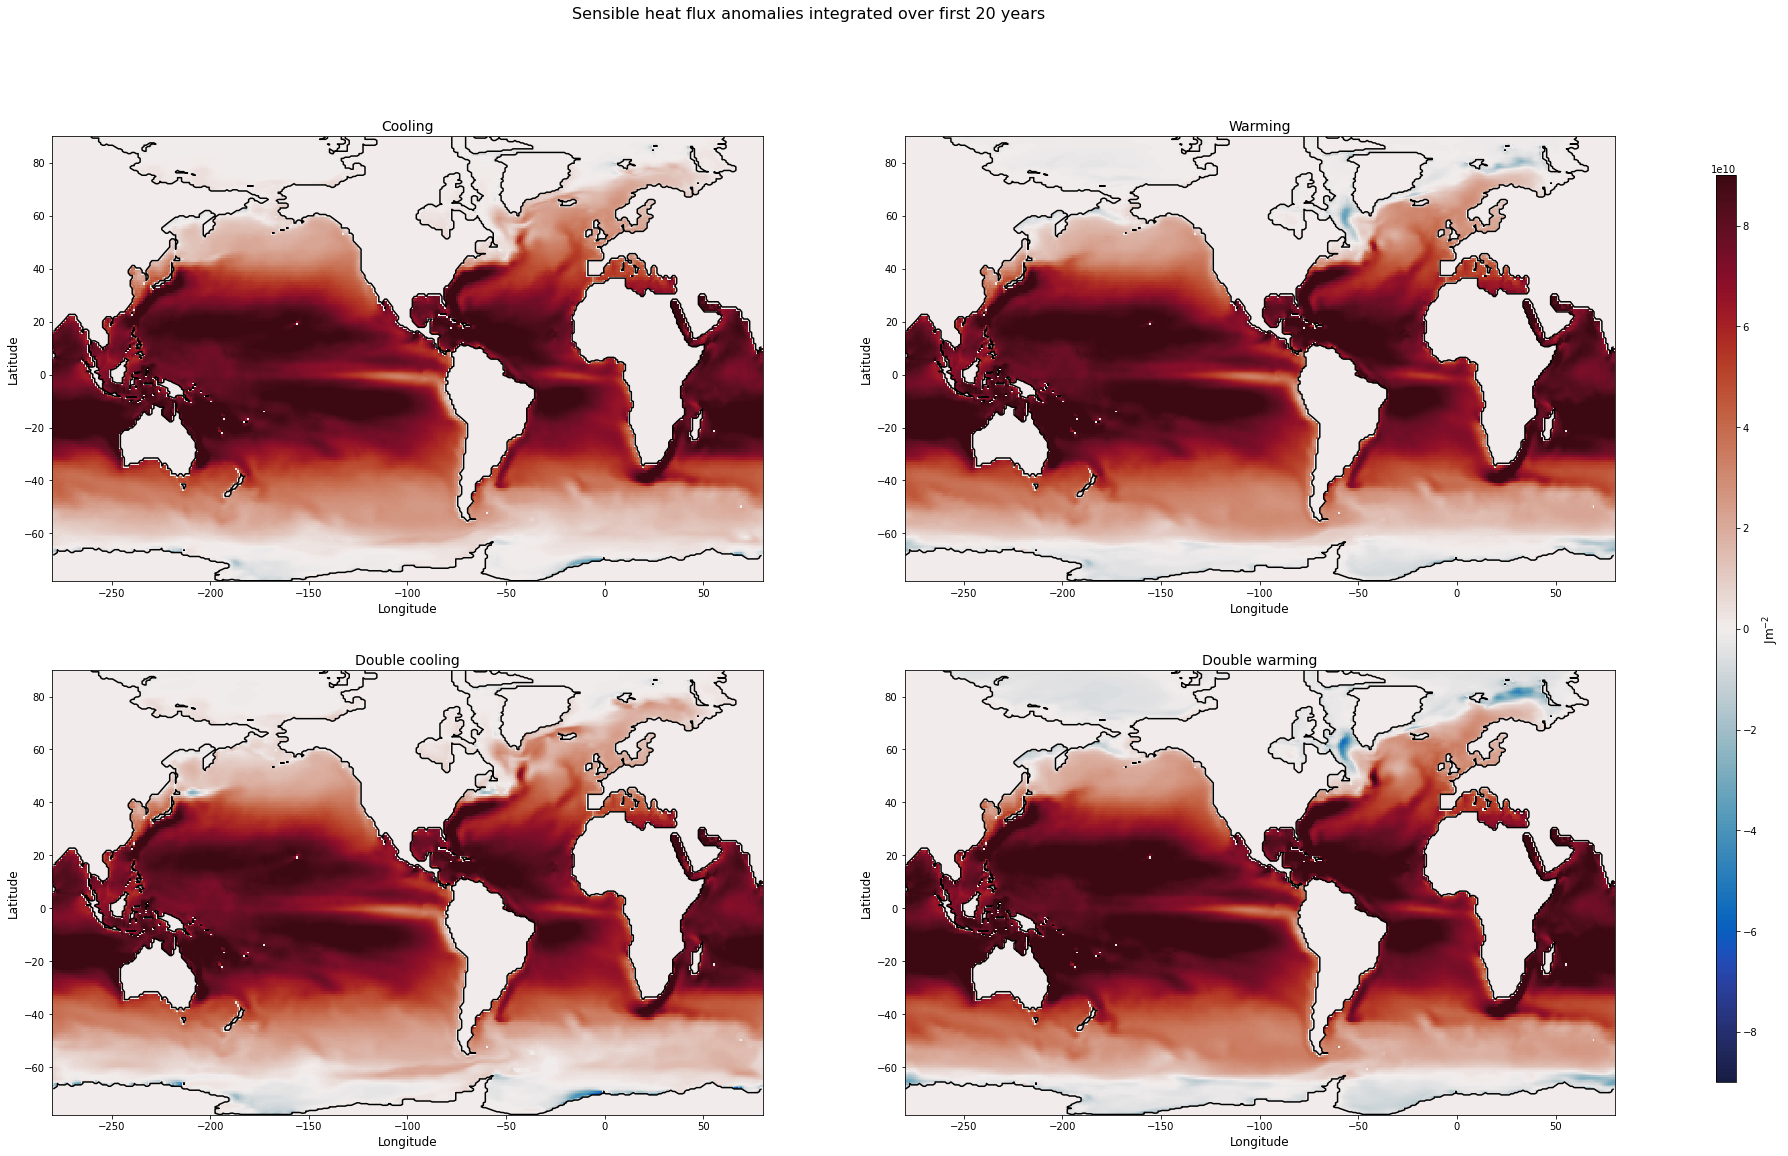

In [79]:
# Plot sens-heat (sensible heat flux)

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(28, 18))
plt.suptitle('Sensible heat flux anomalies integrated over first 20 years', fontsize=16)

yr_beg = '2400-01-01'
yr_end = '2419-12-31'

anom = sens_coolx1 - evap_cont
p1 = (1 * time_integrate(anom, yr_beg, yr_end)).plot(ax = axs[0, 0], cmap = cm.cm.balance, vmin = -9e10, vmax = 9e10, add_colorbar = False)
mask_array.plot.contour(colors = 'k', levels = [2], ax = axs[0, 0])
axs[0, 0].set_title('Cooling', fontsize=14)
axs[0, 0].set_ylabel('Latitude', fontsize=12)
axs[0, 0].set_xlabel('Longitude', fontsize=12)

anom = sens_warmx1 - evap_cont
p2 = time_integrate(anom, yr_beg, yr_end).plot(ax = axs[0, 1], cmap = cm.cm.balance, vmin = -9e10, vmax = 9e10, add_colorbar = False)
mask_array.plot.contour(colors = 'k', levels = [2], ax = axs[0, 1])
axs[0, 1].set_title('Warming', fontsize=14)
axs[0, 1].set_ylabel('Latitude', fontsize=12)
axs[0, 1].set_xlabel('Longitude', fontsize=12)

anom = sens_coolx2 - evap_cont
p1 = (1 * time_integrate(anom, yr_beg, yr_end)).plot(ax = axs[1, 0], cmap = cm.cm.balance, vmin = -9e10, vmax = 9e10, add_colorbar = False)
mask_array.plot.contour(colors = 'k', levels = [2], ax = axs[1, 0])
axs[1, 0].set_title('Double cooling', fontsize=14)
axs[1, 0].set_ylabel('Latitude', fontsize=12)
axs[1, 0].set_xlabel('Longitude', fontsize=12)

anom = sens_warmx2 - evap_cont
p2 = (1 * time_integrate(anom, yr_beg, yr_end)).plot(ax = axs[1, 1], cmap = cm.cm.balance, vmin = -9e10, vmax = 9e10, add_colorbar = False)
mask_array.plot.contour(colors = 'k', levels = [2], ax = axs[1, 1])
axs[1, 1].set_title('Double warming', fontsize=14)
axs[1, 1].set_ylabel('Latitude', fontsize=12)
axs[1, 1].set_xlabel('Longitude', fontsize=12)

cb_ax = fig.add_axes([0.95, 0.15, 0.01, 0.7])
cbar = fig.colorbar(p2, cax = cb_ax)
cbar.ax.set_ylabel('Jm$^{-2}$', fontsize = 12)
#plt.savefig('double_single_bad_pert_sh.jpg')

Text(0, 0.5, 'Jm$^{-2}$')

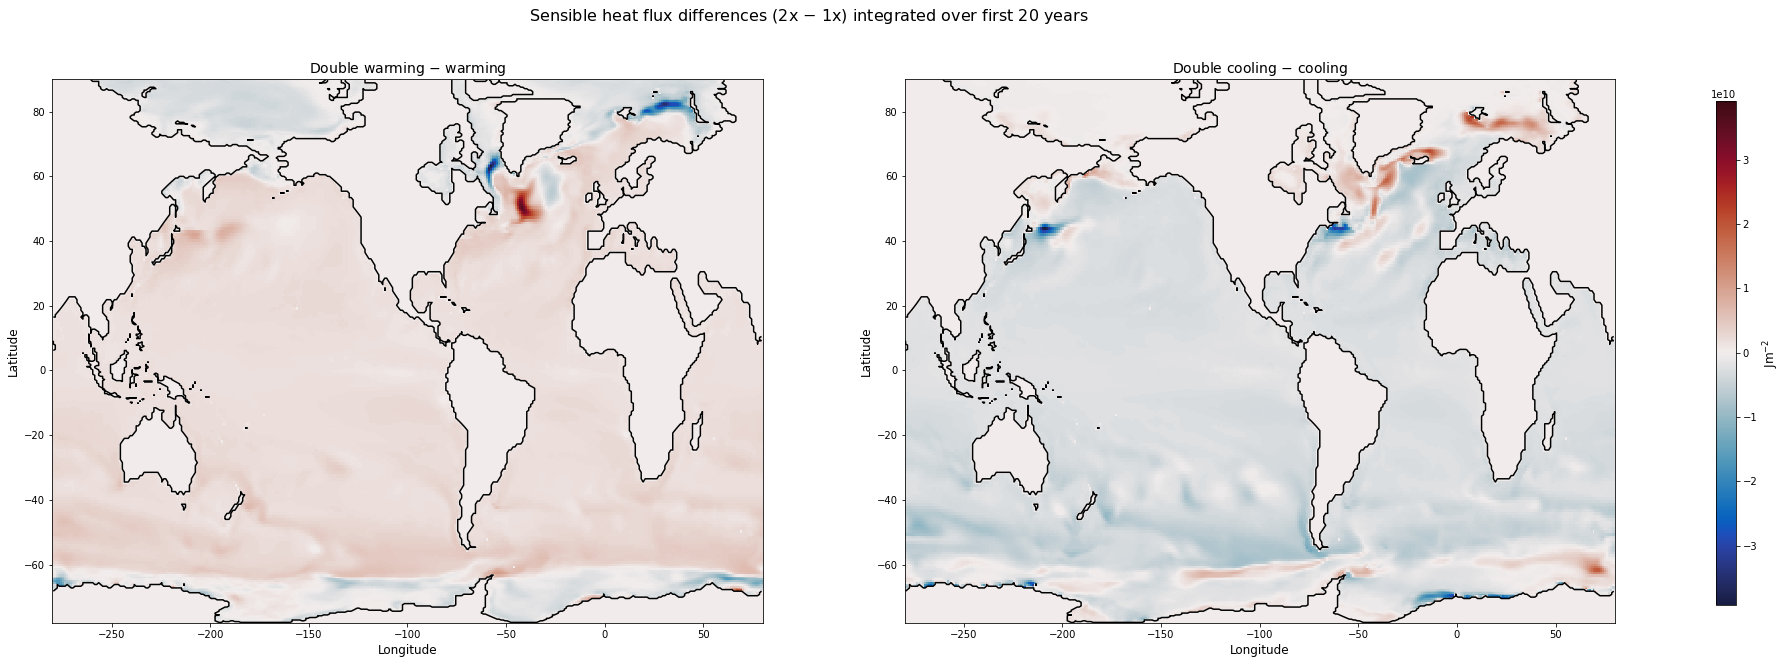

In [54]:
## Difference between warming and cooling; senseible heat

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(28, 10))
plt.suptitle('Sensible heat flux differences (2x $-$ 1x) integrated over first 20 years', fontsize=16)
yr_beg = '2400-01-01'
yr_end = '2419-12-31'

anom = sens_warmx2 - sens_warmx1
p1 = time_integrate(anom, yr_beg, yr_end).plot(ax = axs[0], cmap = cm.cm.balance, add_colorbar = False)
mask_array.plot.contour(colors = 'k', levels = [2], ax = axs[0])
axs[0].set_title('Double warming $-$ warming', fontsize=14)
axs[0].set_ylabel('Latitude', fontsize=12)
axs[0].set_xlabel('Longitude', fontsize=12)

anom = sens_coolx2 - sens_coolx1
p2 = time_integrate(anom, yr_beg, yr_end).plot(ax = axs[1], cmap = cm.cm.balance, add_colorbar = False)
mask_array.plot.contour(colors = 'k', levels = [2], ax = axs[1])
axs[1].set_title('Double cooling $-$ cooling', fontsize=14)
axs[1].set_ylabel('Latitude', fontsize=12)
axs[1].set_xlabel('Longitude', fontsize=12)

cb_ax = fig.add_axes([0.95, 0.15, 0.01, 0.7])
cbar = fig.colorbar(p2, cax = cb_ax)
cbar.ax.set_ylabel('Jm$^{-2}$', fontsize = 12)
#plt.savefig('double_single_bad_pert_.jpg')

#### Longwave heat flux

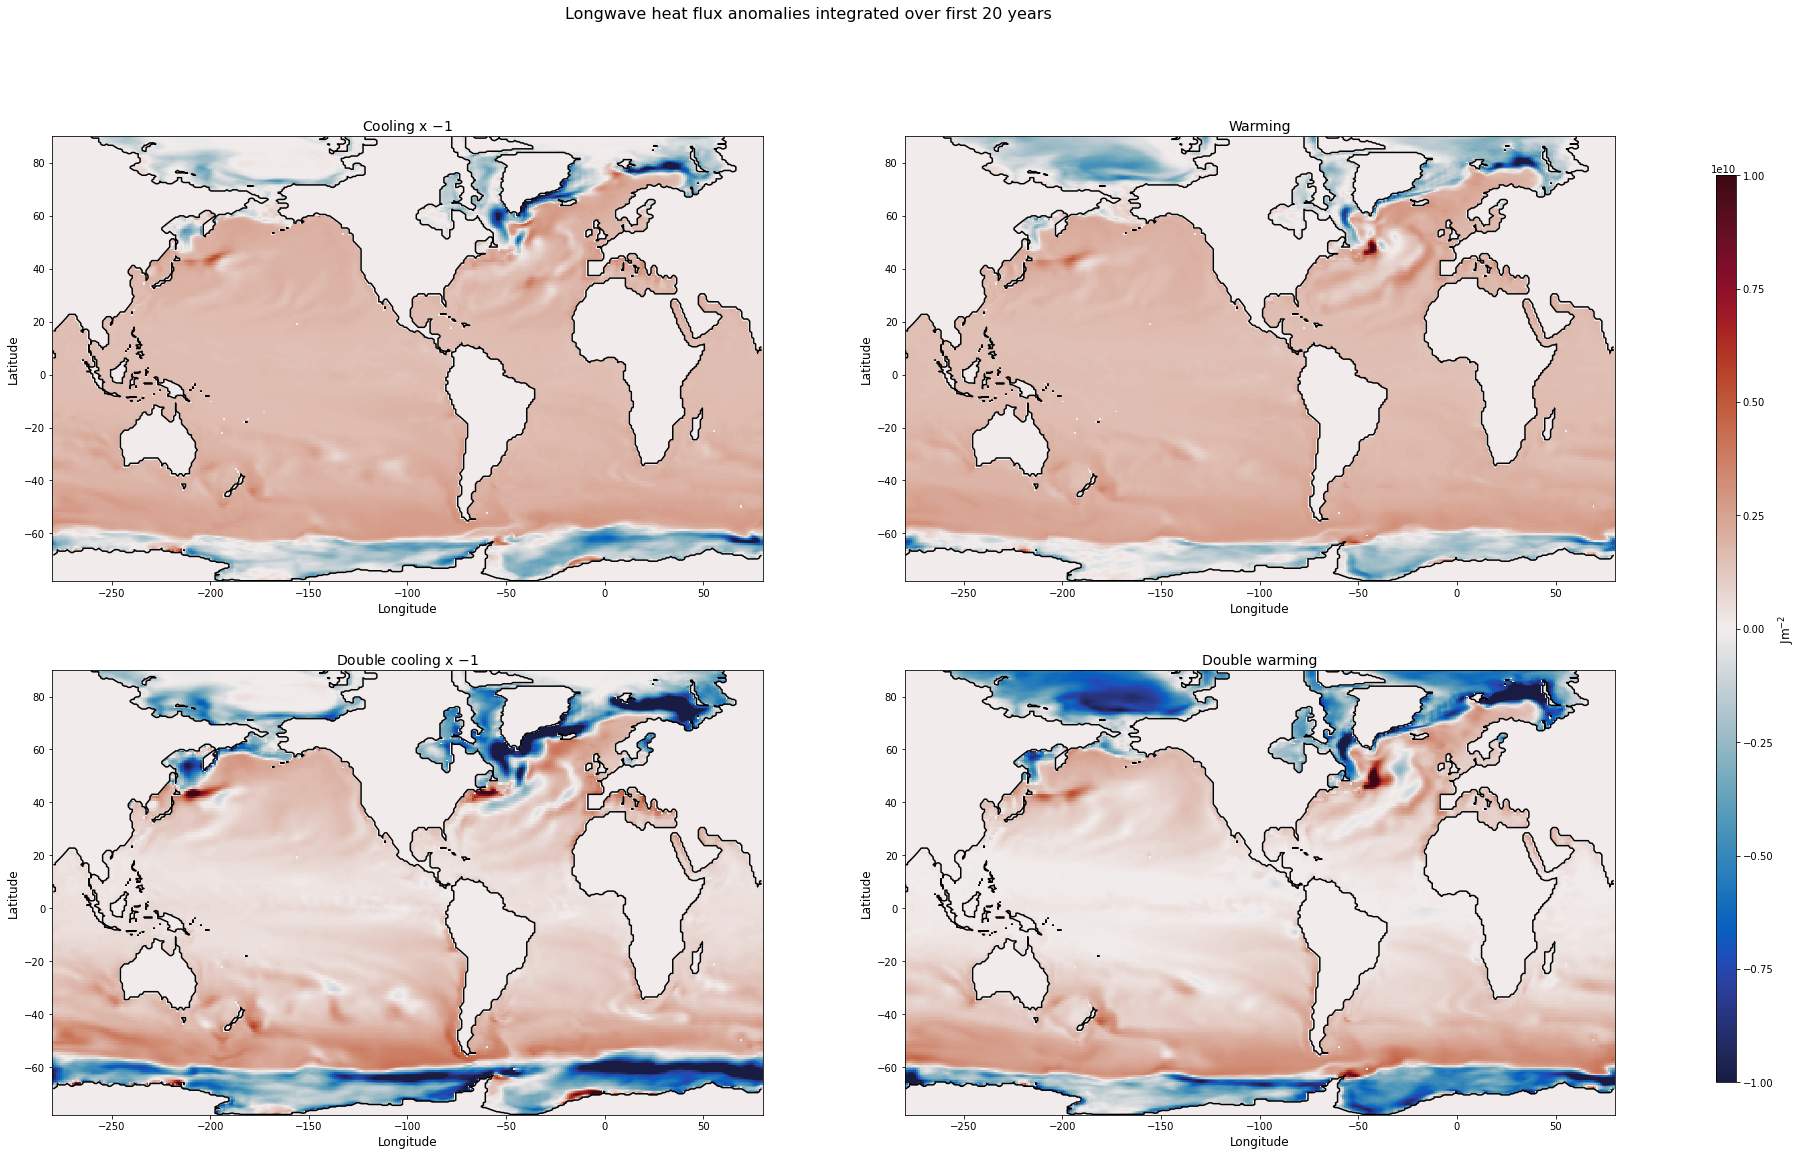

In [80]:
# Plot lw_heat (longwave heat flux)

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(28, 18))
plt.suptitle('Longwave heat flux anomalies integrated over first 20 years', fontsize=16)

yr_beg = '2400-01-01'
yr_end = '2419-12-31'

anom = lw_coolx1 - lw_cont
p1 = (-1 * time_integrate(anom, yr_beg, yr_end)).plot(ax = axs[0, 0], cmap = cm.cm.balance, vmin = -1e10, vmax = 1e10, add_colorbar = False)
mask_array.plot.contour(colors = 'k', levels = [2], ax = axs[0, 0])
axs[0, 0].set_title('Cooling x $-1$', fontsize=14)
axs[0, 0].set_ylabel('Latitude', fontsize=12)
axs[0, 0].set_xlabel('Longitude', fontsize=12)

anom = lw_warmx1 - lw_cont
p2 = time_integrate(anom, yr_beg, yr_end).plot(ax = axs[0, 1], cmap = cm.cm.balance, vmin = -1e10, vmax = 1e10, add_colorbar = False)
mask_array.plot.contour(colors = 'k', levels = [2], ax = axs[0, 1])
axs[0, 1].set_title('Warming', fontsize=14)
axs[0, 1].set_ylabel('Latitude', fontsize=12)
axs[0, 1].set_xlabel('Longitude', fontsize=12)

anom = lw_coolx2 - lw_cont
p1 = (-1 * time_integrate(anom, yr_beg, yr_end)).plot(ax = axs[1, 0], cmap = cm.cm.balance, vmin = -1e10, vmax = 1e10, add_colorbar = False)
mask_array.plot.contour(colors = 'k', levels = [2], ax = axs[1, 0])
axs[1, 0].set_title('Double cooling x $-1$', fontsize=14)
axs[1, 0].set_ylabel('Latitude', fontsize=12)
axs[1, 0].set_xlabel('Longitude', fontsize=12)

anom = lw_warmx2 - lw_cont
p2 = (1 * time_integrate(anom, yr_beg, yr_end)).plot(ax = axs[1, 1], cmap = cm.cm.balance, vmin = -1e10, vmax = 1e10, add_colorbar = False)
mask_array.plot.contour(colors = 'k', levels = [2], ax = axs[1, 1])
axs[1, 1].set_title('Double warming', fontsize=14)
axs[1, 1].set_ylabel('Latitude', fontsize=12)
axs[1, 1].set_xlabel('Longitude', fontsize=12)

cb_ax = fig.add_axes([0.95, 0.15, 0.01, 0.7])
cbar = fig.colorbar(p2, cax = cb_ax)
cbar.ax.set_ylabel('Jm$^{-2}$', fontsize = 12)
#plt.savefig('double_single_bad_pert_lw.jpg')

#### Shortwave heat flux

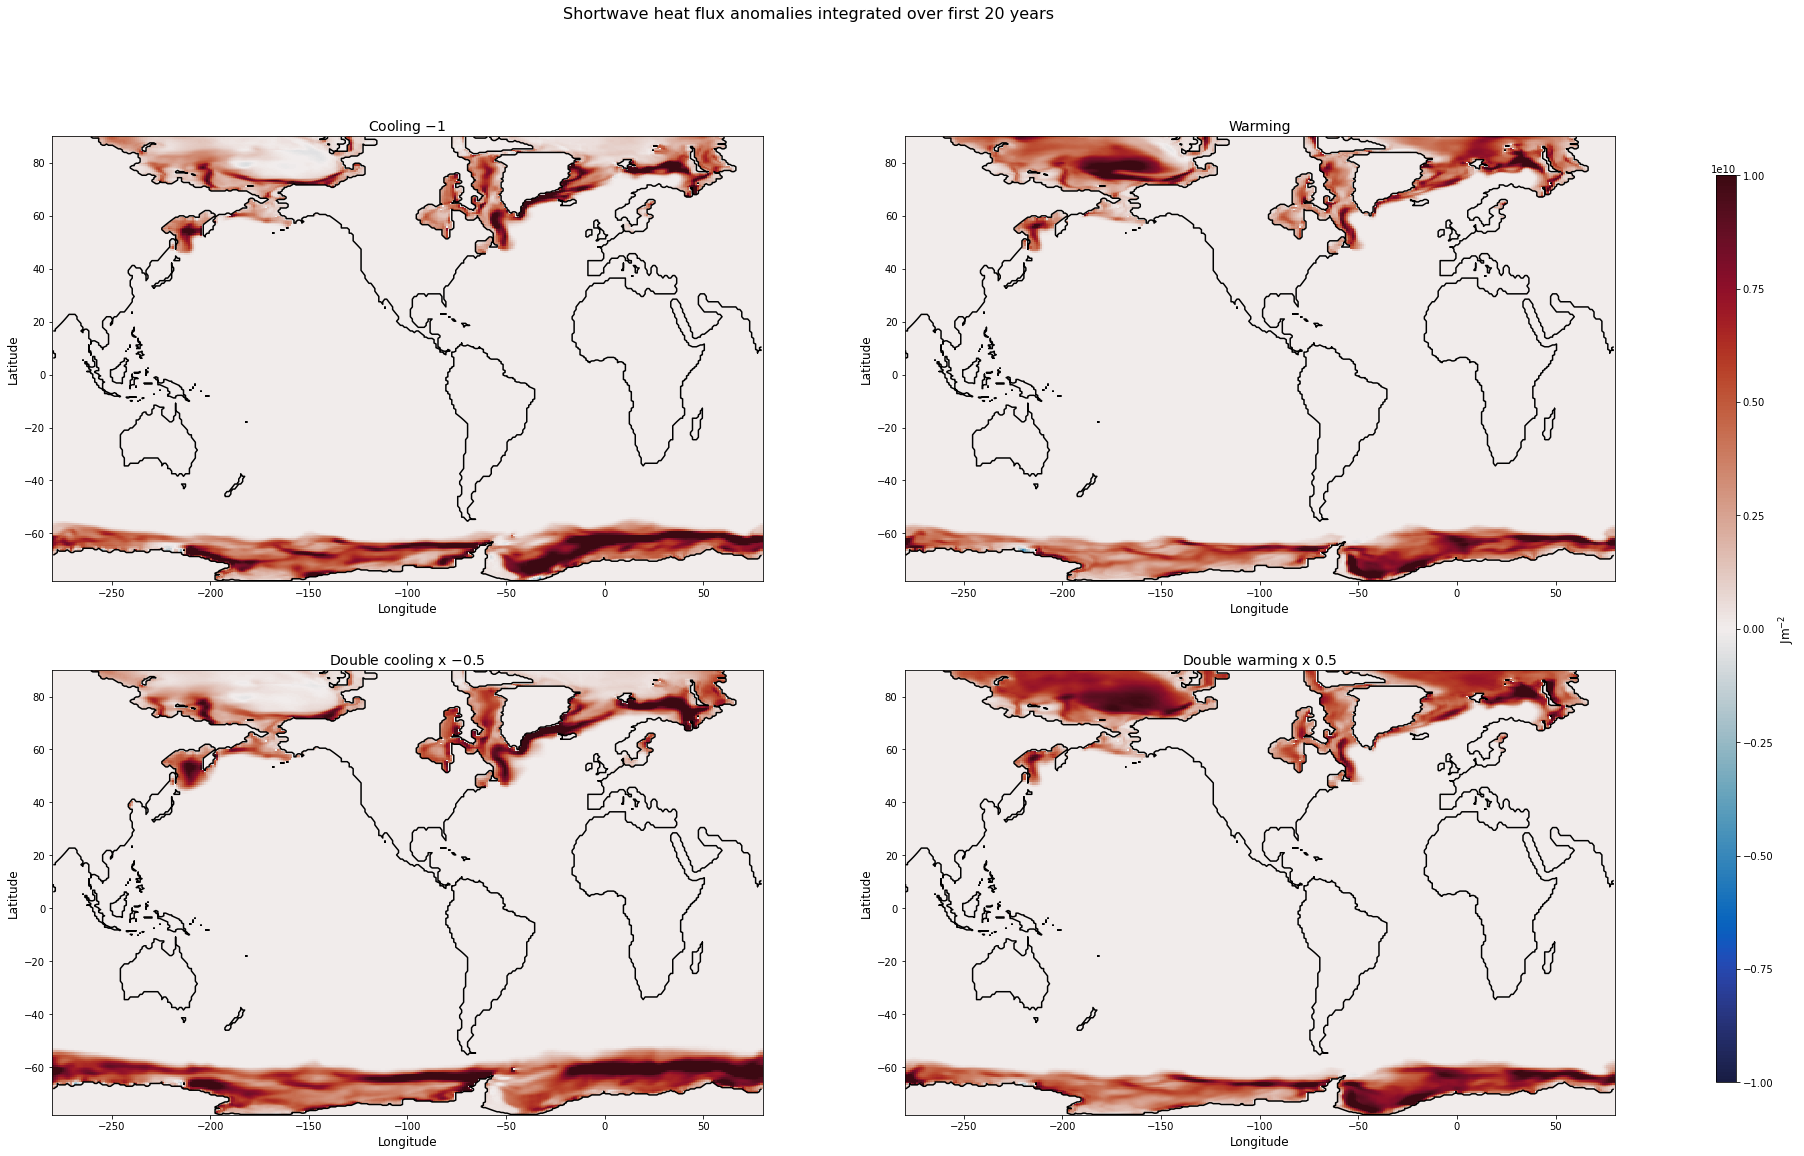

In [81]:
# Plot sw_flx (shortwave heat flux)

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(28, 18))
plt.suptitle('Shortwave heat flux anomalies integrated over first 20 years', fontsize=16)

yr_beg = '2400-01-01'
yr_end = '2419-12-31'

anom = sw_coolx1 - sw_cont
p1 = (-1 * time_integrate(anom, yr_beg, yr_end)).plot(ax = axs[0, 0], cmap = cm.cm.balance, vmin = -1e10, vmax = 1e10, add_colorbar = False)
mask_array.plot.contour(colors = 'k', levels = [2], ax = axs[0, 0])
axs[0, 0].set_title('Cooling $-1$', fontsize=14)
axs[0, 0].set_ylabel('Latitude', fontsize=12)
axs[0, 0].set_xlabel('Longitude', fontsize=12)

anom = sw_warmx1 - sw_cont
p2 = time_integrate(anom, yr_beg, yr_end).plot(ax = axs[0, 1], cmap = cm.cm.balance, vmin = -1e10, vmax = 1e10, add_colorbar = False)
mask_array.plot.contour(colors = 'k', levels = [2], ax = axs[0, 1])
axs[0, 1].set_title('Warming', fontsize=14)
axs[0, 1].set_ylabel('Latitude', fontsize=12)
axs[0, 1].set_xlabel('Longitude', fontsize=12)

anom = sw_coolx2 - sw_cont
p1 = (-0.5 * time_integrate(anom, yr_beg, yr_end)).plot(ax = axs[1, 0], cmap = cm.cm.balance, vmin = -1e10, vmax = 1e10, add_colorbar = False)
mask_array.plot.contour(colors = 'k', levels = [2], ax = axs[1, 0])
axs[1, 0].set_title('Double cooling x $-0.5$', fontsize=14)
axs[1, 0].set_ylabel('Latitude', fontsize=12)
axs[1, 0].set_xlabel('Longitude', fontsize=12)

anom = sw_warmx2 - sw_cont
p2 = (0.5 * time_integrate(anom, yr_beg, yr_end)).plot(ax = axs[1, 1], cmap = cm.cm.balance, vmin = -1e10, vmax = 1e10, add_colorbar = False)
mask_array.plot.contour(colors = 'k', levels = [2], ax = axs[1, 1])
axs[1, 1].set_title('Double warming x $0.5$', fontsize=14)
axs[1, 1].set_ylabel('Latitude', fontsize=12)
axs[1, 1].set_xlabel('Longitude', fontsize=12)

cb_ax = fig.add_axes([0.95, 0.15, 0.01, 0.7])
cbar = fig.colorbar(p2, cax = cb_ax)
cbar.ax.set_ylabel('Jm$^{-2}$', fontsize = 12)
#plt.savefig('double_single_bad_pert_sw.jpg')

## Comparing good and bad perturbation experiments

#### Latent heat flux

In [99]:
bad_good_x2_anom = time_integrate((evap_warmx2_humid - evap_warmx2), yr_beg, yr_end).load()

In [103]:
np.mean(bad_good_x2_anom), np.max(bad_good_x2_anom), np.min(bad_good_x2_anom) 

(<xarray.DataArray ()>
 array(0.),
 <xarray.DataArray ()>
 array(0.),
 <xarray.DataArray ()>
 array(0.))

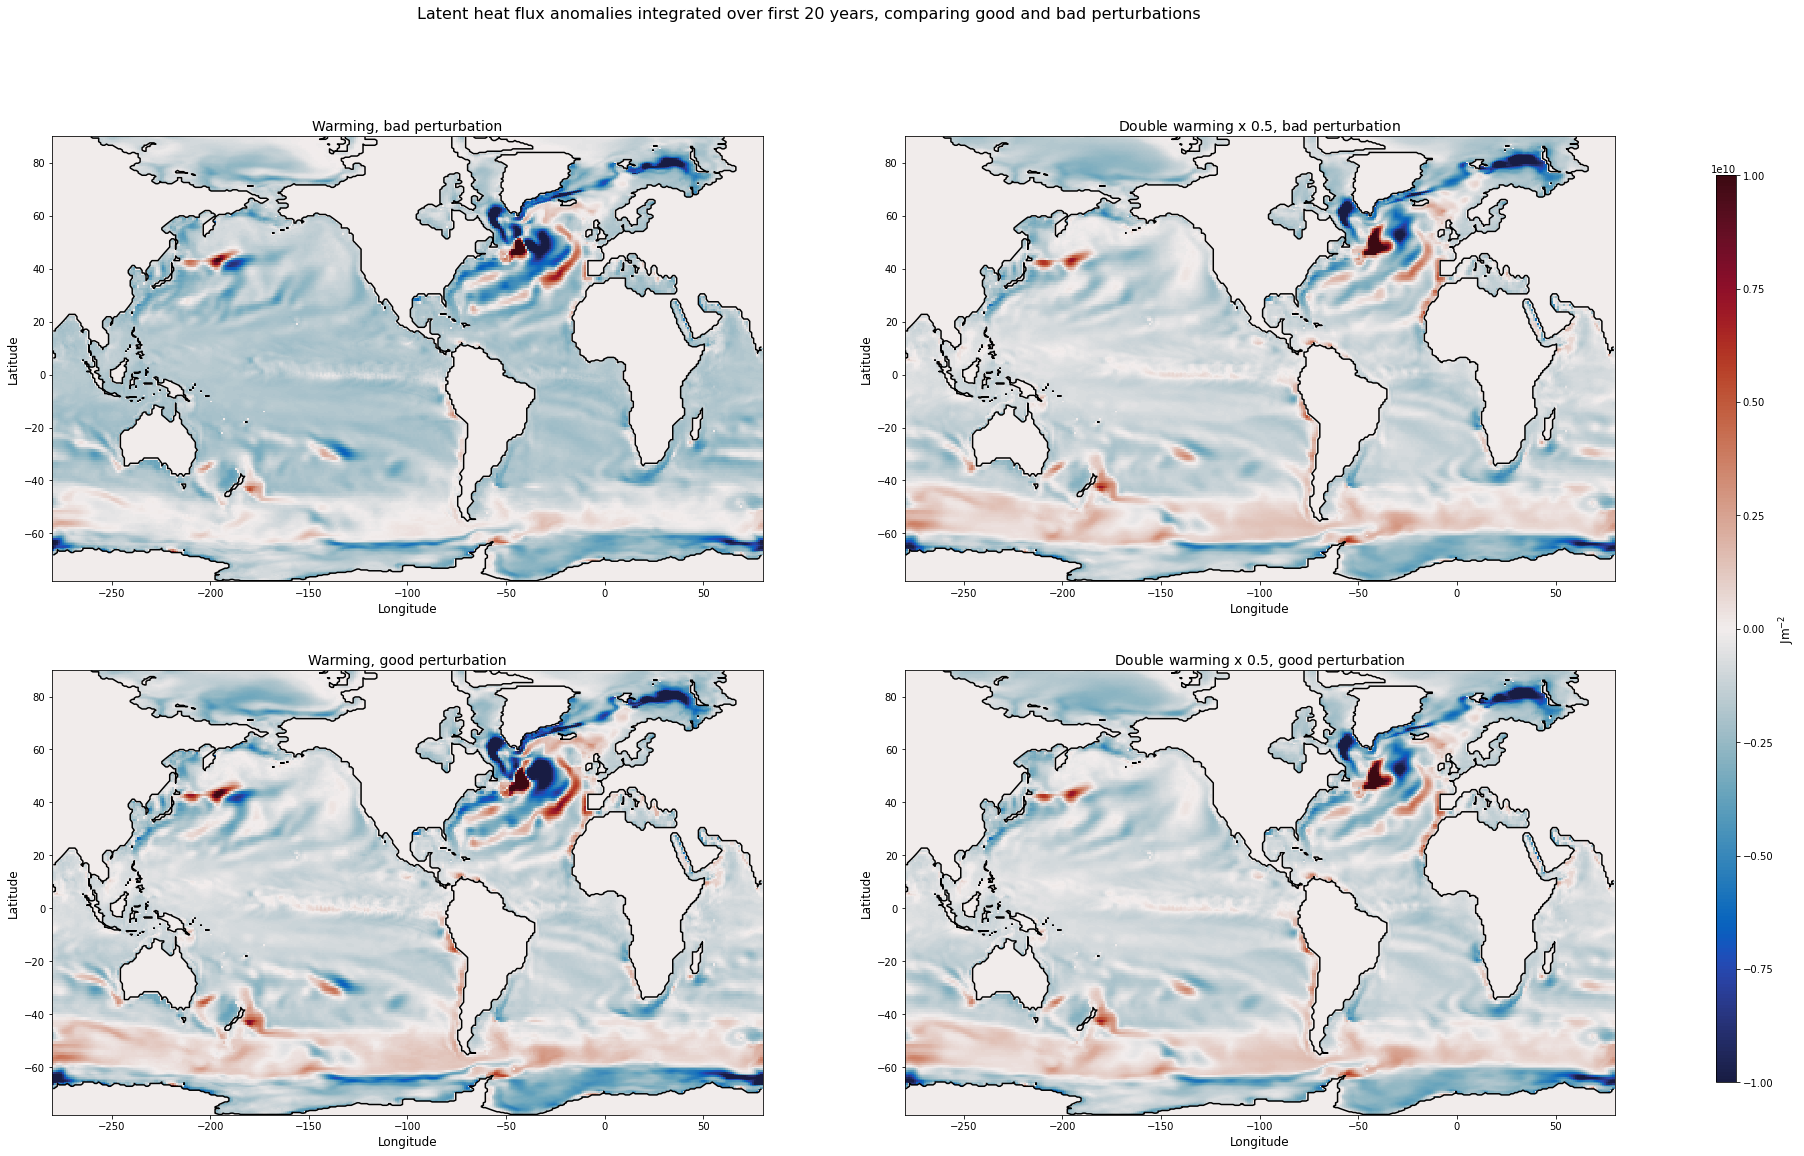

In [116]:
# Plot evap_heat (latent heat flux)

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(28, 18))
plt.suptitle('Latent heat flux anomalies integrated over first 20 years, comparing good and bad perturbations', fontsize=16)

yr_beg = '2400-01-01'
yr_end = '2419-12-31'

anom = evap_warmx1 - evap_cont
p1 = time_integrate(anom, yr_beg, yr_end).plot(ax = axs[0, 0], cmap = cm.cm.balance, vmin = -1e10, vmax = 1e10, add_colorbar = False)
mask_array.plot.contour(colors = 'k', levels = [2], ax = axs[0, 0])
axs[0, 0].set_title('Warming, bad perturbation', fontsize=14)
axs[0, 0].set_ylabel('Latitude', fontsize=12)
axs[0, 0].set_xlabel('Longitude', fontsize=12)

anom = evap_warmx2 - evap_cont
p2 = (0.5 * time_integrate(anom, yr_beg, yr_end)).plot(ax = axs[0, 1], cmap = cm.cm.balance, vmin = -1e10, vmax = 1e10, add_colorbar = False)
mask_array.plot.contour(colors = 'k', levels = [2], ax = axs[0, 1])
axs[0, 1].set_title('Double warming x $0.5$, bad perturbation', fontsize=14)
axs[0, 1].set_ylabel('Latitude', fontsize=12)
axs[0, 1].set_xlabel('Longitude', fontsize=12)

anom = evap_warmx1_humid - evap_cont
p1 = time_integrate(anom, yr_beg, yr_end).plot(ax = axs[1, 0], cmap = cm.cm.balance, vmin = -1e10, vmax = 1e10, add_colorbar = False)
mask_array.plot.contour(colors = 'k', levels = [2], ax = axs[1, 0])
axs[1, 0].set_title('Warming, good perturbation', fontsize=14)
axs[1, 0].set_ylabel('Latitude', fontsize=12)
axs[1, 0].set_xlabel('Longitude', fontsize=12)

anom = evap_warmx2_humid - evap_cont
p2 = (0.5 * time_integrate(anom, yr_beg, yr_end)).plot(ax = axs[1, 1], cmap = cm.cm.balance, vmin = -1e10, vmax = 1e10, add_colorbar = False)
mask_array.plot.contour(colors = 'k', levels = [2], ax = axs[1, 1])
axs[1, 1].set_title('Double warming x $0.5$, good perturbation', fontsize=14)
axs[1, 1].set_ylabel('Latitude', fontsize=12)
axs[1, 1].set_xlabel('Longitude', fontsize=12)

cb_ax = fig.add_axes([0.95, 0.15, 0.01, 0.7])
cbar = fig.colorbar(p2, cax = cb_ax)
cbar.ax.set_ylabel('Jm$^{-2}$', fontsize = 12)
plt.savefig('good_bad_pert_lh.jpg')

#### Sensible heat flux

In [106]:
bad_good_x2_anom = time_integrate((sens_warmx2_humid - sens_warmx2), yr_beg, yr_end).load()

In [107]:
np.mean(bad_good_x2_anom), np.max(bad_good_x2_anom), np.min(bad_good_x2_anom) 

(<xarray.DataArray ()>
 array(0.),
 <xarray.DataArray ()>
 array(0.),
 <xarray.DataArray ()>
 array(0.))

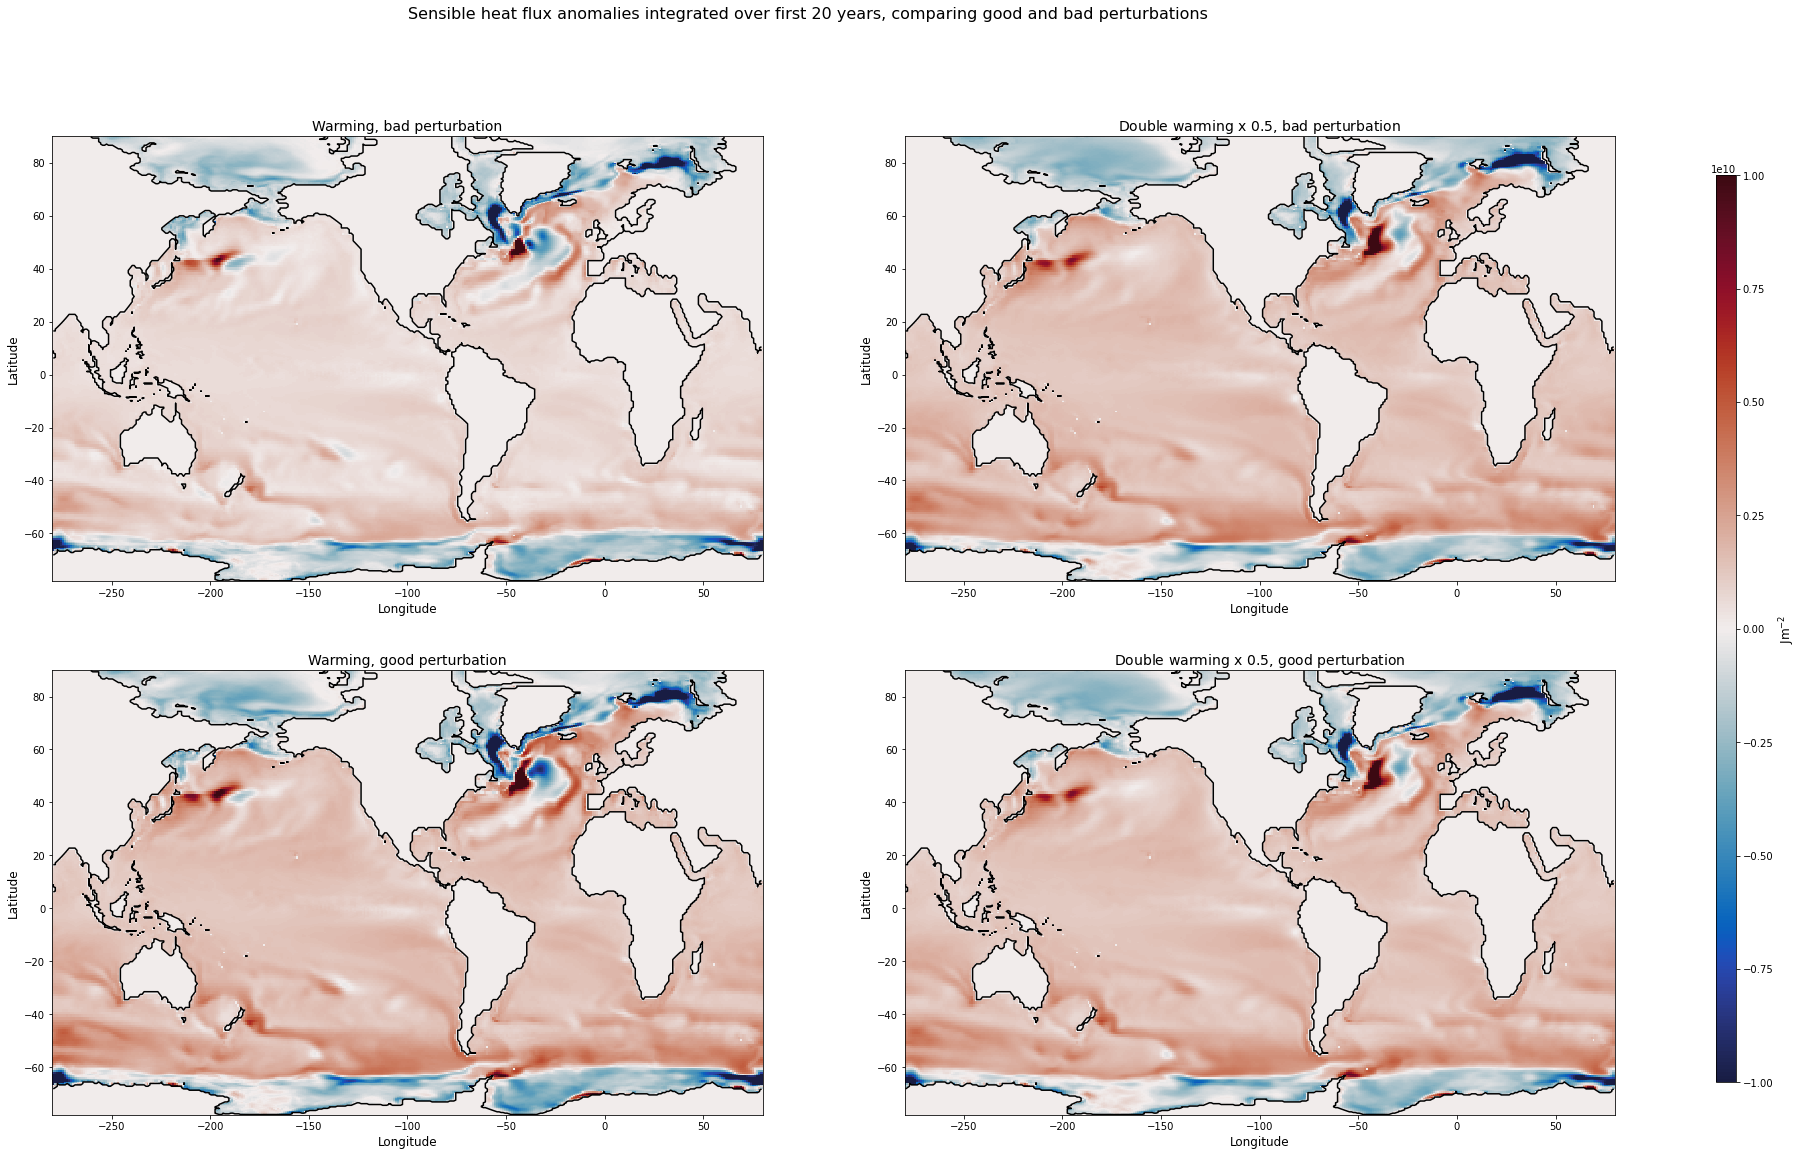

In [117]:
# Plot sens_heat (sensible heat flux)

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(28, 18))
plt.suptitle('Sensible heat flux anomalies integrated over first 20 years, comparing good and bad perturbations', fontsize=16)

yr_beg = '2400-01-01'
yr_end = '2419-12-31'

anom = sens_warmx1 - sens_cont
p1 = time_integrate(anom, yr_beg, yr_end).plot(ax = axs[0, 0], cmap = cm.cm.balance, vmin = -1e10, vmax = 1e10, add_colorbar = False)
mask_array.plot.contour(colors = 'k', levels = [2], ax = axs[0, 0])
axs[0, 0].set_title('Warming, bad perturbation', fontsize=14)
axs[0, 0].set_ylabel('Latitude', fontsize=12)
axs[0, 0].set_xlabel('Longitude', fontsize=12)

anom = sens_warmx2 - sens_cont
p2 = (0.5 * time_integrate(anom, yr_beg, yr_end)).plot(ax = axs[0, 1], cmap = cm.cm.balance, vmin = -1e10, vmax = 1e10, add_colorbar = False)
mask_array.plot.contour(colors = 'k', levels = [2], ax = axs[0, 1])
axs[0, 1].set_title('Double warming x $0.5$, bad perturbation', fontsize=14)
axs[0, 1].set_ylabel('Latitude', fontsize=12)
axs[0, 1].set_xlabel('Longitude', fontsize=12)

anom = sens_warmx1_humid - sens_cont
p1 = time_integrate(anom, yr_beg, yr_end).plot(ax = axs[1, 0], cmap = cm.cm.balance, vmin = -1e10, vmax = 1e10, add_colorbar = False)
mask_array.plot.contour(colors = 'k', levels = [2], ax = axs[1, 0])
axs[1, 0].set_title('Warming, good perturbation', fontsize=14)
axs[1, 0].set_ylabel('Latitude', fontsize=12)
axs[1, 0].set_xlabel('Longitude', fontsize=12)

anom = sens_warmx2_humid - sens_cont
p2 = (0.5 * time_integrate(anom, yr_beg, yr_end)).plot(ax = axs[1, 1], cmap = cm.cm.balance, vmin = -1e10, vmax = 1e10, add_colorbar = False)
mask_array.plot.contour(colors = 'k', levels = [2], ax = axs[1, 1])
axs[1, 1].set_title('Double warming x $0.5$, good perturbation', fontsize=14)
axs[1, 1].set_ylabel('Latitude', fontsize=12)
axs[1, 1].set_xlabel('Longitude', fontsize=12)

cb_ax = fig.add_axes([0.95, 0.15, 0.01, 0.7])
cbar = fig.colorbar(p2, cax = cb_ax)
cbar.ax.set_ylabel('Jm$^{-2}$', fontsize = 12)
plt.savefig('good_bad_pert_sh.jpg')

#### Longwave heat flux

In [108]:
bad_good_x2_anom = time_integrate((lw_warmx2_humid - lw_warmx2), yr_beg, yr_end).load()

In [109]:
np.mean(bad_good_x2_anom), np.max(bad_good_x2_anom), np.min(bad_good_x2_anom) 

(<xarray.DataArray ()>
 array(0.),
 <xarray.DataArray ()>
 array(0.),
 <xarray.DataArray ()>
 array(0.))

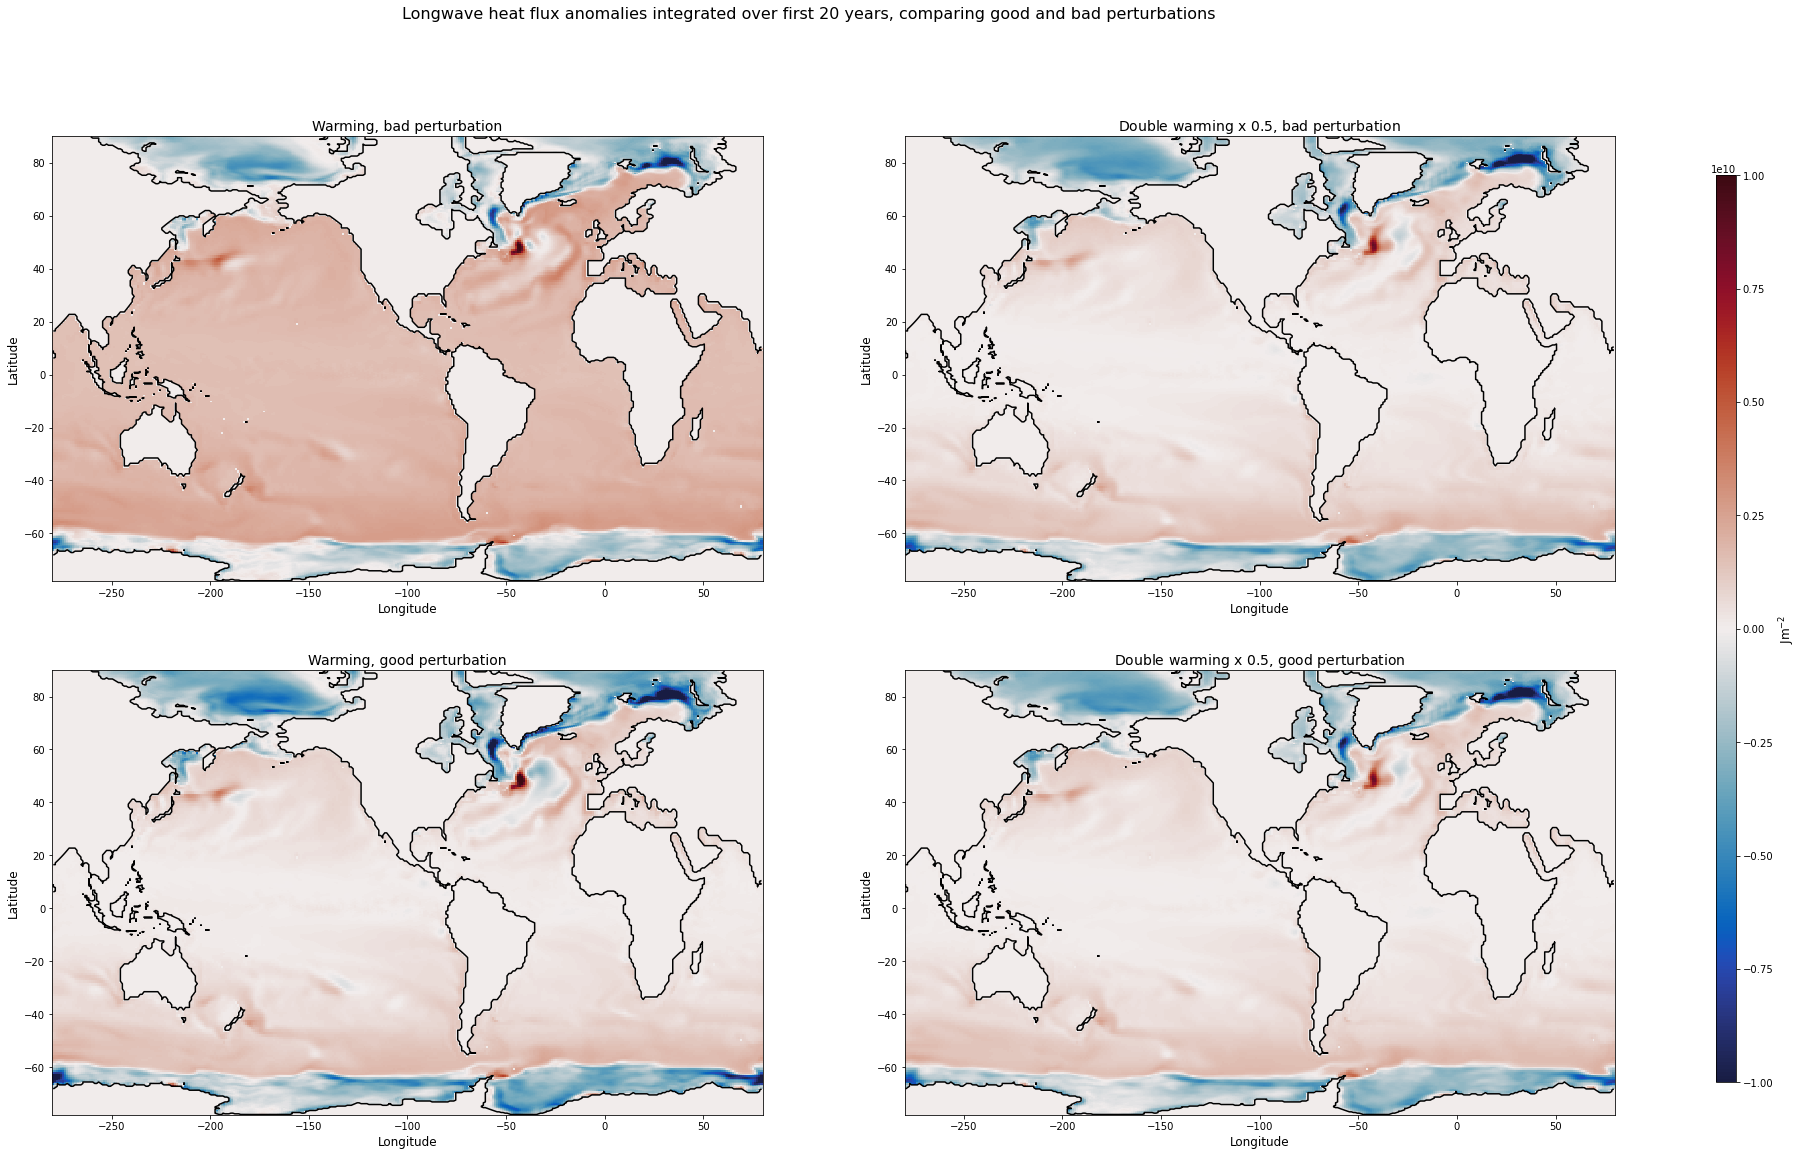

In [118]:
# Plot lw_heat (longwave heat flux)

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(28, 18))
plt.suptitle('Longwave heat flux anomalies integrated over first 20 years, comparing good and bad perturbations', fontsize=16)

yr_beg = '2400-01-01'
yr_end = '2419-12-31'

anom = lw_warmx1 - lw_cont
p1 = time_integrate(anom, yr_beg, yr_end).plot(ax = axs[0, 0], cmap = cm.cm.balance, vmin = -1e10, vmax = 1e10, add_colorbar = False)
mask_array.plot.contour(colors = 'k', levels = [2], ax = axs[0, 0])
axs[0, 0].set_title('Warming, bad perturbation', fontsize=14)
axs[0, 0].set_ylabel('Latitude', fontsize=12)
axs[0, 0].set_xlabel('Longitude', fontsize=12)

anom = lw_warmx2 - lw_cont
p2 = (0.5 * time_integrate(anom, yr_beg, yr_end)).plot(ax = axs[0, 1], cmap = cm.cm.balance, vmin = -1e10, vmax = 1e10, add_colorbar = False)
mask_array.plot.contour(colors = 'k', levels = [2], ax = axs[0, 1])
axs[0, 1].set_title('Double warming x $0.5$, bad perturbation', fontsize=14)
axs[0, 1].set_ylabel('Latitude', fontsize=12)
axs[0, 1].set_xlabel('Longitude', fontsize=12)

anom = lw_warmx1_humid - lw_cont
p1 = time_integrate(anom, yr_beg, yr_end).plot(ax = axs[1, 0], cmap = cm.cm.balance, vmin = -1e10, vmax = 1e10, add_colorbar = False)
mask_array.plot.contour(colors = 'k', levels = [2], ax = axs[1, 0])
axs[1, 0].set_title('Warming, good perturbation', fontsize=14)
axs[1, 0].set_ylabel('Latitude', fontsize=12)
axs[1, 0].set_xlabel('Longitude', fontsize=12)

anom = lw_warmx2_humid - lw_cont
p2 = (0.5 * time_integrate(anom, yr_beg, yr_end)).plot(ax = axs[1, 1], cmap = cm.cm.balance, vmin = -1e10, vmax = 1e10, add_colorbar = False)
mask_array.plot.contour(colors = 'k', levels = [2], ax = axs[1, 1])
axs[1, 1].set_title('Double warming x $0.5$, good perturbation', fontsize=14)
axs[1, 1].set_ylabel('Latitude', fontsize=12)
axs[1, 1].set_xlabel('Longitude', fontsize=12)

cb_ax = fig.add_axes([0.95, 0.15, 0.01, 0.7])
cbar = fig.colorbar(p2, cax = cb_ax)
cbar.ax.set_ylabel('Jm$^{-2}$', fontsize = 12)
plt.savefig('good_bad_pert_lw.jpg')

#### Shortwave heat flux

In [111]:
bad_good_x2_anom = time_integrate((sw_warmx2_humid - sw_warmx2), yr_beg, yr_end).load()

In [112]:
np.mean(bad_good_x2_anom), np.max(bad_good_x2_anom), np.min(bad_good_x2_anom) 

(<xarray.DataArray ()>
 array(0.),
 <xarray.DataArray ()>
 array(0.),
 <xarray.DataArray ()>
 array(0.))

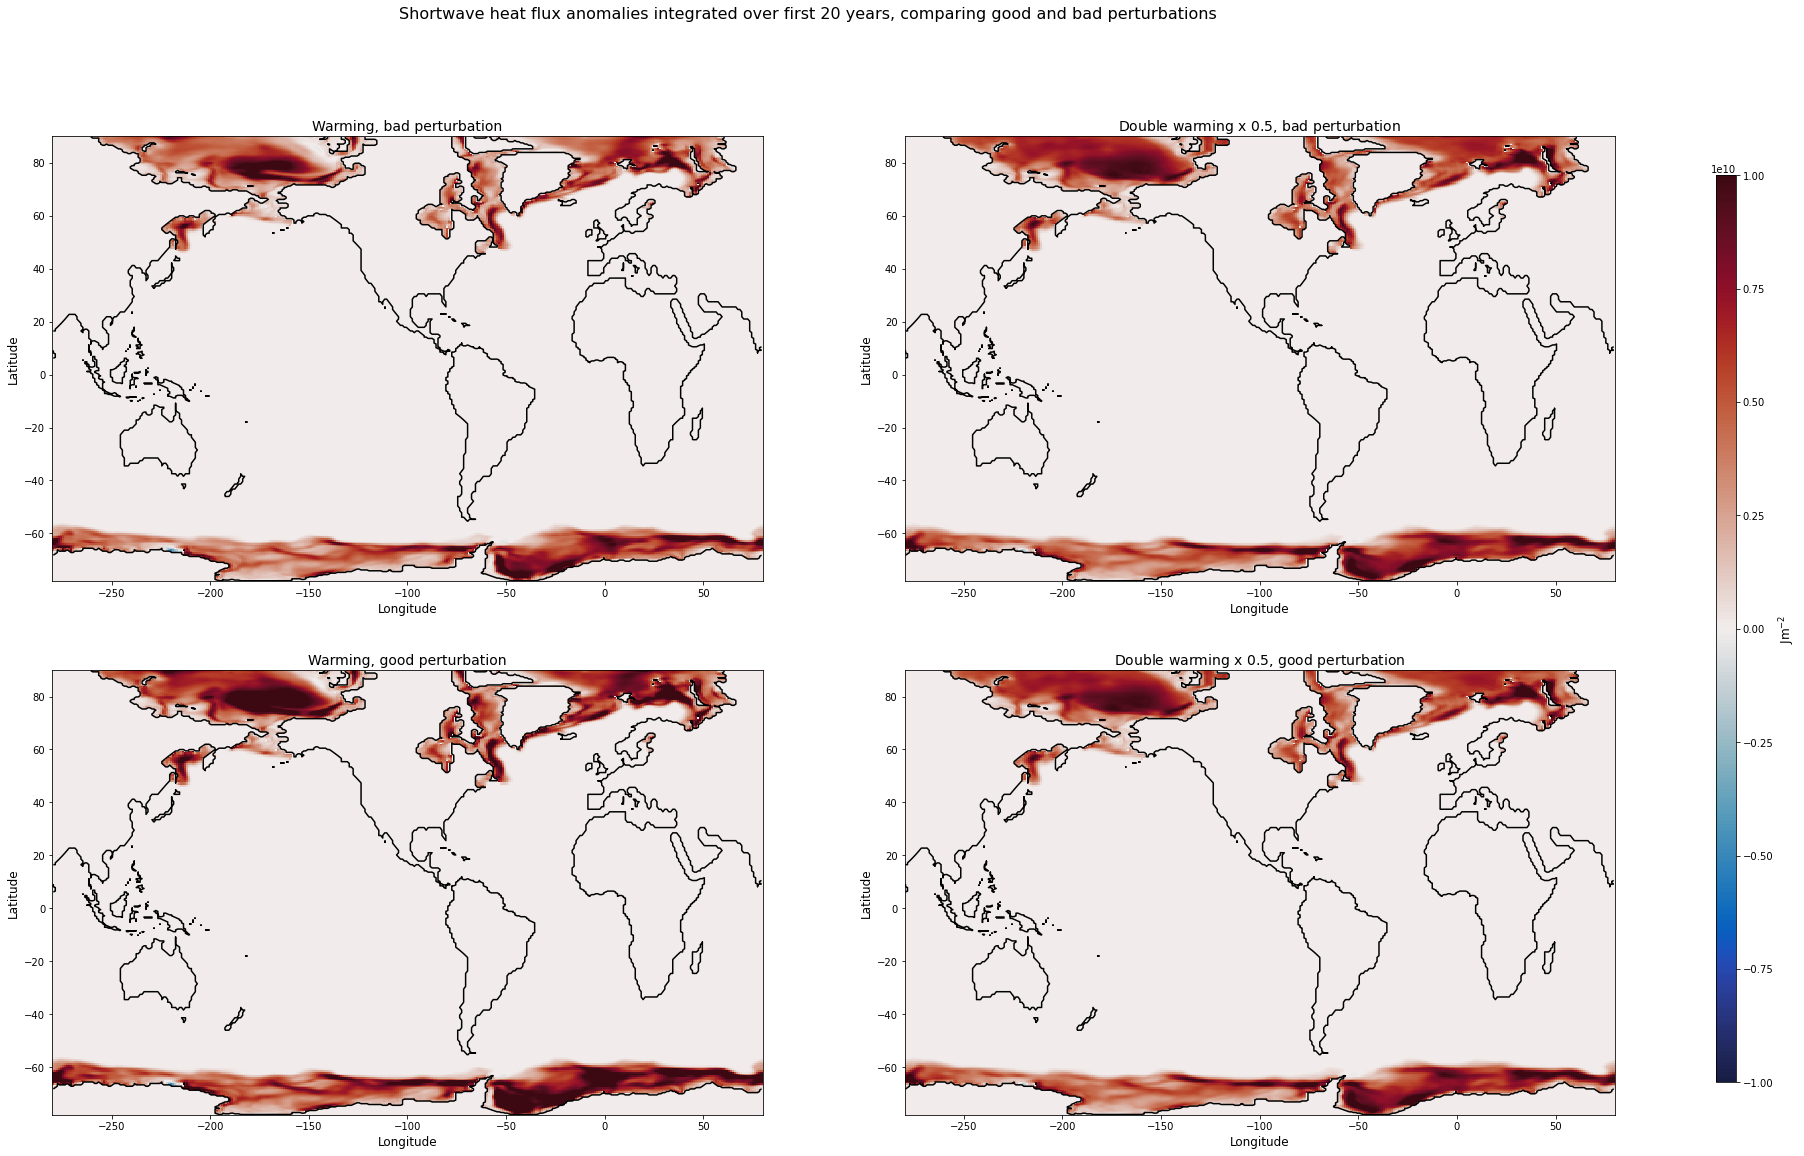

In [119]:
# Plot sw_flx (shortwave heat flux)

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(28, 18))
plt.suptitle('Shortwave heat flux anomalies integrated over first 20 years, comparing good and bad perturbations', fontsize=16)

yr_beg = '2400-01-01'
yr_end = '2419-12-31'

anom = sw_warmx1 - sw_cont
p1 = time_integrate(anom, yr_beg, yr_end).plot(ax = axs[0, 0], cmap = cm.cm.balance, vmin = -1e10, vmax = 1e10, add_colorbar = False)
mask_array.plot.contour(colors = 'k', levels = [2], ax = axs[0, 0])
axs[0, 0].set_title('Warming, bad perturbation', fontsize=14)
axs[0, 0].set_ylabel('Latitude', fontsize=12)
axs[0, 0].set_xlabel('Longitude', fontsize=12)

anom = sw_warmx2 - sw_cont
p2 = (0.5 * time_integrate(anom, yr_beg, yr_end)).plot(ax = axs[0, 1], cmap = cm.cm.balance, vmin = -1e10, vmax = 1e10, add_colorbar = False)
mask_array.plot.contour(colors = 'k', levels = [2], ax = axs[0, 1])
axs[0, 1].set_title('Double warming x $0.5$, bad perturbation', fontsize=14)
axs[0, 1].set_ylabel('Latitude', fontsize=12)
axs[0, 1].set_xlabel('Longitude', fontsize=12)

anom = sw_warmx1_humid - sw_cont
p1 = time_integrate(anom, yr_beg, yr_end).plot(ax = axs[1, 0], cmap = cm.cm.balance, vmin = -1e10, vmax = 1e10, add_colorbar = False)
mask_array.plot.contour(colors = 'k', levels = [2], ax = axs[1, 0])
axs[1, 0].set_title('Warming, good perturbation', fontsize=14)
axs[1, 0].set_ylabel('Latitude', fontsize=12)
axs[1, 0].set_xlabel('Longitude', fontsize=12)

anom = sw_warmx2_humid - sw_cont
p2 = (0.5 * time_integrate(anom, yr_beg, yr_end)).plot(ax = axs[1, 1], cmap = cm.cm.balance, vmin = -1e10, vmax = 1e10, add_colorbar = False)
mask_array.plot.contour(colors = 'k', levels = [2], ax = axs[1, 1])
axs[1, 1].set_title('Double warming x $0.5$, good perturbation', fontsize=14)
axs[1, 1].set_ylabel('Latitude', fontsize=12)
axs[1, 1].set_xlabel('Longitude', fontsize=12)

cb_ax = fig.add_axes([0.95, 0.15, 0.01, 0.7])
cbar = fig.colorbar(p2, cax = cb_ax)
cbar.ax.set_ylabel('Jm$^{-2}$', fontsize = 12)
plt.savefig('good_bad_pert_sw.jpg')